In [1]:
# Author: Chad Lohrli 
# Date: December 24,2017
# Discription: Perceptron Classification w/ Iris dataset
# Library: Numpy

In [2]:
#Libraries
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

--Decision Boundary--
-5.0840461093*x1 + -10.8821682283*x2 + 17.7633913018*x3 + 8.28720275931*x4 = 2.0

--Error Metrics--
precision:1.0, recall:1.00, fscore:1.00, accuracy:1.0


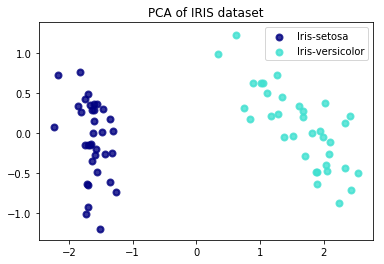

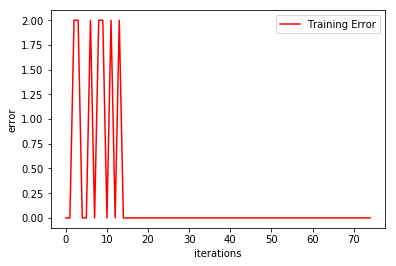

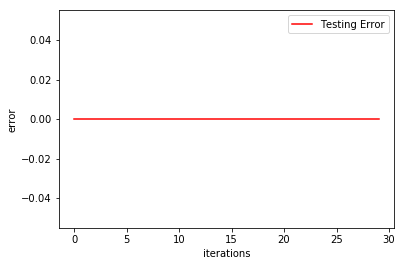

In [6]:
# --Data Pre-processing-- #

data = np.loadtxt('Q1_data.txt', delimiter=',', usecols=[0,1,2,3])
d1 = np.insert(data[0:50,:], 4, -1, axis=1) #Iris-setosa = -1
d2 = np.insert(data[50:100,:], 4, 1, axis=1) #Iris-versicolor = 1

train = np.vstack((d1[0:35,:],d2[0:35,:]))
test = np.vstack((d1[35:50,:],d2[35:50,:]))

xtrain = train[:,0:4]
ytrain = train[:,4:5]

xtest = test[:,0:4]
ytest = test[:,4:5]

# --PCA Data Plotting-- #

target_names = ['Iris-setosa', 'Iris-versicolor']

pca = PCA(n_components=2)
Xplot = pca.fit(xtrain).transform(xtrain)
yplot = ytrain.reshape(70,)

plt.figure(0)
colors = ['navy', 'turquoise']
lw = 2

for color, i, target_name in zip(colors, [-1, 1], target_names):
    plt.scatter(Xplot[yplot == i, 0], Xplot[yplot == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
   

# --Perceptron Training-- #


#Prediction(activation) 
def predict(x,w,b):
    check = np.dot(w.T,x)+b
    if(check >= 0):
        return 1;
    else:
        return -1;
    
def plot_error(num,err):
    plt.figure(num)
    if num == 1:
        plt.plot(np.abs(err),'r-',label="Training Error")
    else:
        plt.plot(np.abs(err),'r-',label="Testing Error")
    plt.xlabel('iterations')
    plt.ylabel('error')
    plt.legend()


#Define Train Parameters
w = np.random.random((4,1))  
b = 0
alpha = 1
iters = 75
err = []

#Define Metric Parameters
tp = 0.
fn = 0.
tn = 0.
fp = 0.

#Training 
for i in xrange(iters):
    idx = np.random.randint(xtrain.shape[0])
    fxi = predict(xtrain[idx],w,b)
    error = (ytrain[idx] - fxi)
    err.append(error)
    if(error == 0):
        continue
    else:
        w = w + alpha*error*(xtrain[idx].reshape(4,1))
        b = b + alpha*error
    
plot_error(1,err)

# --Perceptron Testing-- #

m = len(ytest)
err = []

for i in xrange(m):
    fxi = predict(xtest[i],w,b)
    error = ytest[i] - fxi
    err.append(error)
    
    #Error Metrics
    if(ytest[i] == 1 and fxi == 1):
        tp += 1
    elif(ytest[i] == 1 and fxi == -1):
        fn += 1
    elif(ytest[i] == -1 and fxi == -1):
        tn += 1
    elif(ytest[i] == -1 and fxi == 1):
        fp += 1  

plot_error(2,err)

precision = tp / (tp + fp)
recall = tp / (tp + fn)
fscore = 2 * (recall * precision)/(recall + precision)
accuracy = (tp + tn) / (tp + tn + fn + fp)

print("--Decision Boundary--")
print("{}*x1 + {}*x2 + {}*x3 + {}*x4 = {}").format(w[0][0],w[1][0],w[2][0],w[3][0],-b[0])
print("")
print("--Error Metrics--")
print("precision:{}, recall:{:0.2f}, fscore:{:0.2f}, accuracy:{}").format(precision,recall,fscore,accuracy)